Mohammad Attiqi, using Bike Sharing Data to create regression model to predict count of rentals per hour

In [9]:
!pip install pycaret

In [10]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [11]:
from pycaret.datasets import get_data
dataset = get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [12]:
#removing unnecassary columns
del dataset['instant']
del dataset['dteday']
del dataset['yr']
del dataset['mnth']

In [13]:
#check the shape of data
dataset.shape

(17379, 11)

In [14]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15641, 11)
Unseen Data For Predictions: (1738, 11)


In [15]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'cnt', session_id=123) 

,Description,Value
0,session_id,123
1,Target,cnt
2,Original Data,"(15641, 11)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10948, 22)"


In [16]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,4.563370e+01,4.618779e+03,6.790230e+01,8.587000e-01,0.4704,5.108000e-01,0.129
rf,Random Forest Regressor,4.614460e+01,5.008688e+03,7.072450e+01,8.467000e-01,0.4191,4.257000e-01,3.317
et,Extra Trees Regressor,4.684130e+01,5.210543e+03,7.215210e+01,8.406000e-01,0.4254,4.361000e-01,2.996
gbr,Gradient Boosting Regressor,5.840790e+01,7.234175e+03,8.502090e+01,7.789000e-01,0.6758,9.026000e-01,0.744
knn,K Neighbors Regressor,5.672870e+01,7.472144e+03,8.642400e+01,7.713000e-01,0.4913,5.270000e-01,0.094
dt,Decision Tree Regressor,5.902180e+01,9.085450e+03,9.526590e+01,7.220000e-01,0.5416,5.083000e-01,0.066
ada,AdaBoost Regressor,8.932520e+01,1.319707e+04,1.148298e+02,5.961000e-01,0.9806,2.127500e+00,0.418
ridge,Ridge Regression,1.071009e+02,2.125335e+04,1.457489e+02,3.505000e-01,1.1981,3.134200e+00,0.019
br,Bayesian Ridge,1.070988e+02,2.125248e+04,1.457457e+02,3.505000e-01,1.1979,3.133300e+00,0.028
lr,Linear Regression,1.071037e+02,2.125480e+04,1.457541e+02,3.505000e-01,1.1985,3.134900e+00,0.023


In [17]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,105.2404,20555.3800,143.3715,0.3678,1.1681,3.0810
1,105.5159,19568.6239,139.8879,0.3627,1.1919,3.2441
2,109.9090,22562.6133,150.2086,0.3458,1.2374,3.3952
3,107.1670,21378.4113,146.2136,0.3177,1.1804,3.2282
4,105.4041,20966.7389,144.7990,0.3836,1.2631,3.7571
5,111.5823,22547.6595,150.1588,0.3426,1.2013,2.9245
6,105.0314,20191.9776,142.0985,0.3459,1.1336,2.5665
7,105.6998,21323.9047,146.0271,0.3446,1.2105,3.0804
8,110.1241,22251.9715,149.1709,0.3343,1.1977,3.1054
9,105.3633,21200.7427,145.6047,0.3596,1.2013,2.9668


In [18]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,105.2459,20559.4255,143.3856,0.3677,1.1681,3.0805
1,105.4872,19558.2549,139.8508,0.3630,1.1920,3.2427
2,109.9230,22565.0240,150.2166,0.3458,1.2367,3.3934
3,107.1595,21379.3710,146.2169,0.3177,1.1797,3.2267
4,105.3946,20957.9562,144.7686,0.3839,1.2621,3.7582
5,111.5743,22544.5111,150.1483,0.3427,1.2010,2.9256
6,105.0107,20186.8697,142.0805,0.3460,1.1326,2.5644
7,105.6826,21322.8454,146.0234,0.3446,1.2118,3.0787
8,110.1419,22254.1918,149.1784,0.3342,1.1968,3.1042
9,105.3891,21205.0106,145.6194,0.3594,1.2006,2.9674


In [19]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.1552,3980.1638,63.0885,0.8776,0.4696,0.5049
1,46.7630,4982.7960,70.5889,0.8377,0.4992,0.5428
2,45.4084,4653.8235,68.2189,0.8651,0.4700,0.5348
3,47.5166,5027.2097,70.9028,0.8396,0.4668,0.5409
4,44.4220,4389.0742,66.2501,0.8710,0.4882,0.5609
5,48.8042,5358.4042,73.2011,0.8438,0.4631,0.5025
6,45.2357,4232.8166,65.0601,0.8629,0.4752,0.4885
7,45.0703,4613.0871,67.9197,0.8582,0.4561,0.4738
8,45.1525,4442.7913,66.6543,0.8671,0.4669,0.4893
9,44.8087,4507.6228,67.1388,0.8638,0.4494,0.4700


In [20]:
tuned_lr = tune_model(lr)
print(tuned_lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,105.2404,20555.3791,143.3715,0.3678,1.1681,3.0810
1,105.5159,19568.6246,139.8879,0.3627,1.1919,3.2441
2,109.9089,22562.6124,150.2086,0.3458,1.2374,3.3952
3,107.1670,21378.4133,146.2136,0.3177,1.1804,3.2282
4,105.4041,20966.7393,144.7990,0.3836,1.2631,3.7571
5,111.5823,22547.6604,150.1588,0.3426,1.2013,2.9245
6,105.0315,20191.9763,142.0985,0.3459,1.1336,2.5665
7,105.6998,21323.9047,146.0271,0.3446,1.2105,3.0804
8,110.1241,22251.9707,149.1709,0.3343,1.1977,3.1054
9,105.3632,21200.7422,145.6047,0.3596,1.2013,2.9668


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


In [21]:
tuned_ridge = tune_model(ridge)
print(tuned_ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,105.2468,20564.7342,143.4041,0.3676,1.1681,3.0784
1,105.4280,19540.3417,139.7868,0.3636,1.1922,3.2398
2,109.9597,22573.9232,150.2462,0.3455,1.2401,3.3904
3,107.1210,21374.5021,146.2002,0.3178,1.1797,3.2221
4,105.3892,20947.9566,144.7341,0.3842,1.2615,3.7614
5,111.5514,22537.4388,150.1247,0.3429,1.1985,2.9281
6,104.9800,20181.4703,142.0615,0.3462,1.1326,2.5617
7,105.6666,21323.4778,146.0256,0.3446,1.2104,3.0746
8,110.1743,22260.1222,149.1983,0.3340,1.1949,3.1003
9,105.4490,21216.2994,145.6582,0.3591,1.2014,2.9698


Ridge(alpha=4.42, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


In [22]:
tuned_lightgbm = tune_model(lightgbm)
print(tuned_lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47.4100,4306.0892,65.6208,0.8676,0.6443,0.8930
1,49.4693,4763.8506,69.0207,0.8448,0.6540,0.8595
2,48.3145,4953.2071,70.3790,0.8564,0.6313,0.7508
3,49.2053,5116.6026,71.5304,0.8367,0.6122,0.8113
4,47.2777,4799.2613,69.2767,0.8589,0.6377,0.8204
5,50.8468,5419.0592,73.6143,0.8420,0.5841,0.7282
6,48.5475,4737.0424,68.8262,0.8465,0.5881,0.7300
7,47.2488,4715.3323,68.6683,0.8551,0.6008,0.7307
8,47.7195,4707.7987,68.6134,0.8592,0.6101,0.7764
9,47.1392,4731.2373,68.7840,0.8571,0.5860,0.7269


LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


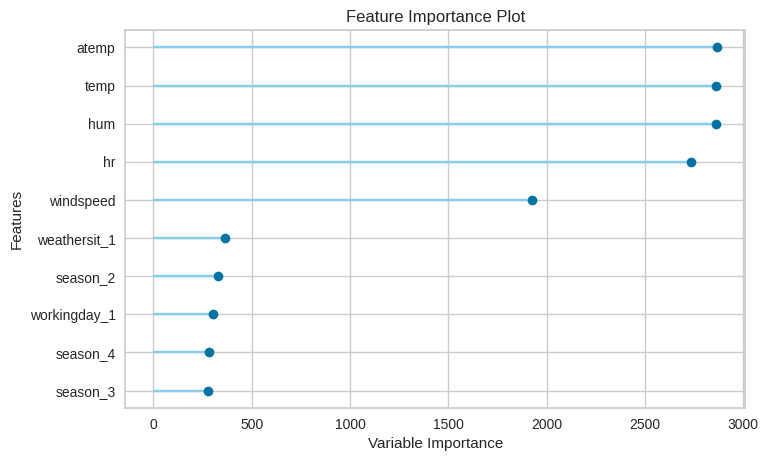

In [23]:
plot_model(tuned_lightgbm, plot='feature')

In [44]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [45]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,47.1736,4601.9267,67.8375,0.8586,0.6015,0.769


In [46]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [47]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,37.6176,2916.4349,54.004,0.9104,0.5278,0.6276


In [48]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,28.204865
1,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,2.679643
2,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,62.231931
3,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,241.339342
4,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,34.285431


In [50]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.cnt, unseen_predictions.Label, 'R2')

0.865

In [51]:
save_model(final_lightgbm,'Final LightGBM Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='cnt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
                    

In [52]:
saved_final_lightgbm = load_model('Final LightGBM Model')

Transformation Pipeline and Model Successfully Loaded


In [53]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [54]:
from pycaret.utils import check_metric
check_metric(new_prediction.cnt, new_prediction.Label, 'R2')

0.865

Lightgbm was used for the best model to predict future bike rentals per hour, as this model provided the lowest RMSE and MAE values as well as the highest R2 amongst the other models that were compared. The experiment resulted in lightgbm producing %86 accuracy on predictions with new unseen data.